In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import ttest_ind
import scipy.stats as stats
import os

In [2]:
# Загрузка данных
df = pd.read_csv('Spotify Most Streamed Songs.csv')

In [3]:
# Просмотр первых 10 строк
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,C#,Major,92,66,58,19,0,8,24,https://i.scdn.co/image/ab67616d0000b273e3a09a...
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,F,Minor,67,83,76,48,0,8,3,https://i.scdn.co/image/ab67616d0000b2732071a0...
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,F,Major,67,26,71,37,0,11,4,https://i.scdn.co/image/ab67616d0000b273a00a81...
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,C#,Minor,85,22,62,12,0,28,9,https://i.scdn.co/image/ab67616d0000b273017d5e...
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,D,Minor,81,56,48,21,0,8,33,Not Found


In [4]:
# Проверка пропусков в данных
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64

In [5]:
# Проверка типов данных
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
cover_url               object
dtype: object

In [6]:
# Фильтрация песен, которые присутствуют в чартях Spotify, Apple и Deezer
all_charts = df[['track_name', 'artist(s)_name', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']]
all_charts = all_charts.loc[(all_charts[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']] != 0).all(axis=1)]

In [7]:
# Сохранение данных в новый файл CSV
all_charts.to_csv('tracks_in_all_charts.csv', index=False)

In [8]:
# Обработка ошибок в колонке "streams"
streams_mistake = df[df['streams'].str.contains(r'\D')]  # Поиск строк с ошибками
mistake_index = streams_mistake.index

In [9]:
# Удаление ошибочных значений
df['streams'] = df['streams'].drop(index=mistake_index)
df['streams'] = df['streams'].fillna(0)  # Заполнение пропусков нулями
df['streams'] = df['streams'].astype(int)  # Преобразование в целое число

In [10]:
# Рассчитываем среднее значение для "streams"
mean_streams = df['streams'].mean()

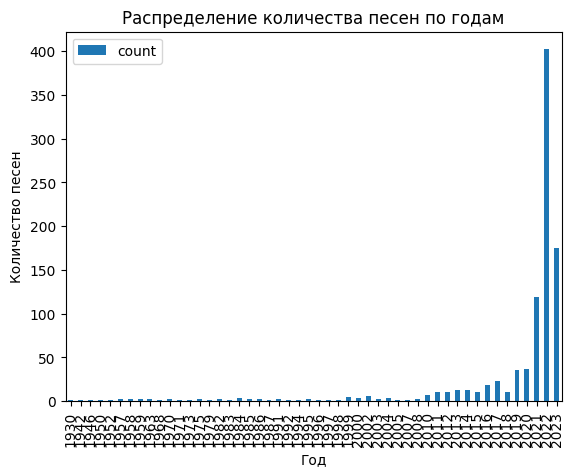

In [11]:
# Анализ по годам выпуска песен
unique_year = df['released_year'].value_counts()
unique_year = pd.DataFrame(unique_year)
unique_year.sort_index().plot(kind='bar')

plt.xlabel('Год')
plt.ylabel('Количество песен')
plt.title('Распределение количества песен по годам')
plt.show()

In [12]:
# Анализ танцевальности песен
danceability = df[['track_name', 'artist(s)_name', 'danceability_%']]
danceability_max = danceability.nlargest(1, columns=["danceability_%"])[["track_name", 'artist(s)_name']]
danceability_min = danceability.nsmallest(1, columns=["danceability_%"])[["track_name", 'artist(s)_name']]

In [13]:
# Среднее значение энергии
energy_mean = df['energy_%'].mean()

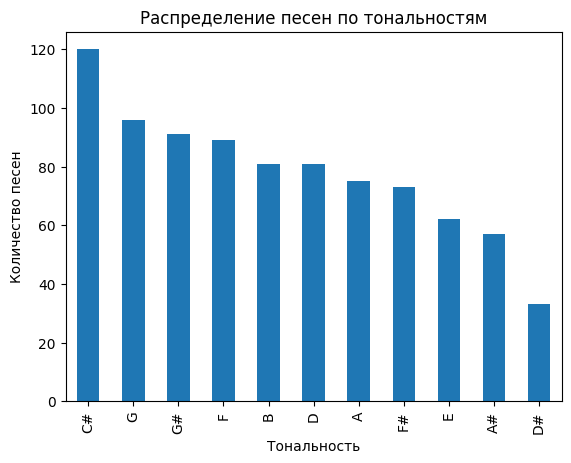

In [14]:
# Распределение по тональностям
statistyc_key = df['key'].value_counts()
statistyc_key.plot(kind='bar')
plt.xlabel('Тональность')
plt.ylabel('Количество песен')
plt.title('Распределение песен по тональностям')
plt.show()

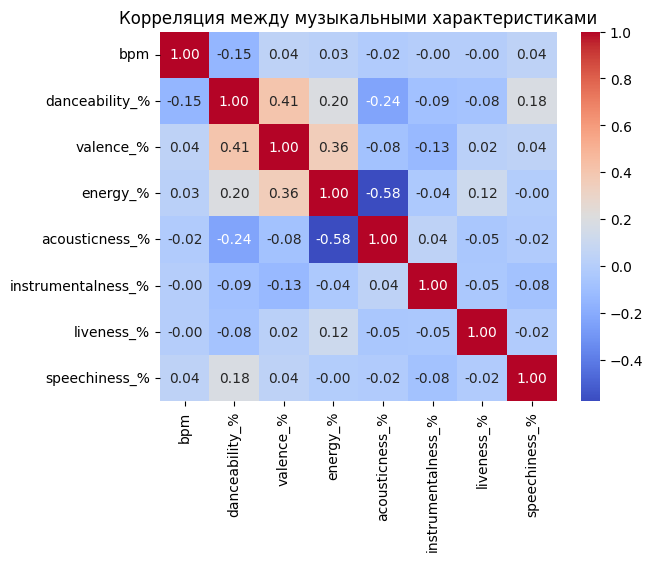

In [15]:
# Корреляционный анализ музыкальных характеристик
attributes_corr = df[['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
corr_matrix = attributes_corr.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между музыкальными характеристиками')
plt.show()

In [16]:
# Анализ по количеству исполнителей на треке
artist_count_one = df[df['artist_count'] == 1]
artist_count_two = df[df['artist_count'] >= 2]

mean_streams_one = artist_count_one['streams'].mean()
mean_streams_two = artist_count_two['streams'].mean()


In [17]:
# Добавление столбца для десятилетий
df['decade'] = 0

In [18]:
# Функция для разделения по десятилетиям
def year(x):
    if 1930 <= x <= 1939:
        return '1930-е'
    elif 1940 <= x <= 1949:
        return '1940-е'
    elif 1950 <= x <= 1959:
        return '1950-е'
    elif 1960 <= x <= 1969:
        return '1960-е'
    elif 1970 <= x <= 1979:
        return '1970-е'
    elif 1980 <= x <= 1989:
        return '1980-е'
    elif 1990 <= x <= 1999:
        return '1990-е'
    elif 2000 <= x <= 2009:
        return '2000-е'
    elif 2010 <= x <= 2019:
        return '2010-е'
    elif 2020 <= x <= 2029:
        return '2020-е'

In [19]:
df['decade'] = df['released_year'].apply(year)

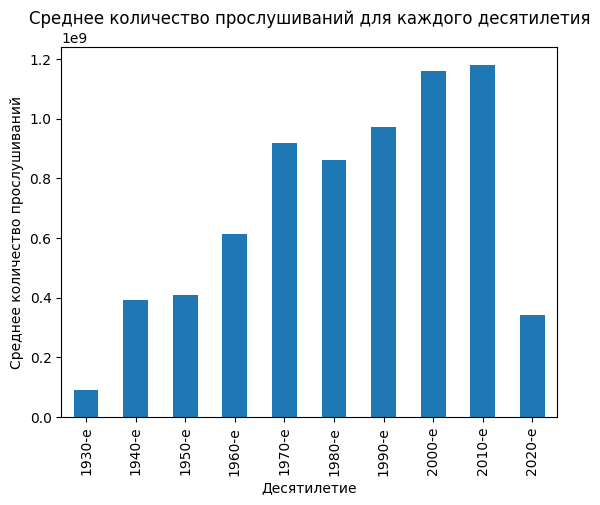

In [20]:
# Среднее количество прослушиваний по десятилетиям
mean_streams_decade = df.groupby('decade')['streams'].mean()
mean_streams_decade.plot(kind='bar')
plt.xlabel('Десятилетие')
plt.ylabel('Среднее количество прослушиваний')
plt.title('Среднее количество прослушиваний для каждого десятилетия')
plt.show()

In [21]:
# Сравнение прослушиваний в 2000-е и 2010-е годы
streams_2000 = df[df['decade'] == '2000-е']['streams']
streams_2010 = df[df['decade'] == '2010-е']['streams']

In [22]:
# T-тест для двух независимых выборок (2000-е vs 2010-е)
t_stat, p_value = stats.ttest_ind(streams_2000, streams_2010)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: -0.11895289143592774, P-Value: 0.9054539547544473


In [23]:
# Анализ по модам (мажор / минор)
df['mode'].value_counts()

major_data = df[df['mode'] == 'Major']
minor_data = df[df['mode'] == 'Minor']

mean_mode_data = df.groupby('mode')['streams'].mean()

In [24]:
# Сравнение прослушиваний мажорных и минорных треков
major_streams = df[df['mode'] == 'Major']['streams']
minor_streams = df[df['mode'] == 'Minor']['streams']

t_stat, p_value = stats.ttest_ind(major_streams, minor_streams)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 1.289690232960315, P-Value: 0.19747177962538243
